In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import os
import joblib

In [2]:
# Load csv file for 

df = pd.read_csv('online_retail.csv')

In [3]:
# Copying the dataset into another variable, to use and make changes, by not affecting the original dataset

or_data = df.copy()

In [4]:
# Display Top 10 Rows

or_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
# The shape of the dataframe

or_data.shape

(541909, 8)

In [6]:
# The index of the dataframe

or_data.index

RangeIndex(start=0, stop=541909, step=1)

In [7]:
# The list of column names present in the dataframe

print(list(or_data.columns))

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


## Attributes Description

There are 8 attributes. They are:

1) InvoiceNo - Unique identifier for each transaction.
2) StockCode - Unique product code for an item.
3) Description - Description of the product.
4) Quantity - Number of units purchased.
5) InvoiceDate - Date and time of the transaction.
6) UnitPrice - Cost of a single unit of the product.
7) CustomerID - Unique identifier for each customer.
8) Country - Country where the customer lives.

In [9]:
# Information about the DataFrame

or_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Pre-Processing

In [11]:
# Check null/missing values

or_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Observation 

There are two attributes : Description and CustomerID that contains the missing values.

In [13]:
# Dropping the column Description 

or_data.drop(columns=['Description'], inplace=True)

### Description 

There attribute description has been dropped because it isn't necessary for analysing customer purchasing behavior patterns.

In [15]:
# The shape of the dataframe after dropping Description column

print("The size of the dataset after dropping Description column : ",or_data.shape,"\n")

# The original shape of the dataframe

print("The size of the dataset before dropping Description column : ",df.shape,"\n")

# Display Top 5 Rows

or_data.head(5)

The size of the dataset after dropping Description column :  (541909, 7) 

The size of the dataset before dropping Description column :  (541909, 8) 



,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Observation 

When observing the shape of the dataframe, we can see that there is reduction in the column, i.e., our data set had 8 columns and after removing the description column we can see there are 7 columns.

In [17]:
# Check null/missing values 

or_data.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Observation 

There is only one attribute CustomerID that contains the missing values.

In [19]:
# Sort the data to ensure consistency

or_data.sort_values(by=['InvoiceNo', 'StockCode', 'InvoiceDate', 'Quantity', 'UnitPrice', 'Country'], inplace=True)

# Remove the rows in CustomerID that contain null values

or_data.dropna(subset=['CustomerID'],axis=0,inplace=True)

# Check null/missing values 

or_data.isnull().sum()


InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Observation 

After sorting data there was an observation there was no matching rows when gouped by InvoiceNo,StockCode,InvoiceDate,Quantity,UnitPrice,Country, these columns didn't have same CustomerID i.e., each CustomerID had only a single row which contained null values, so the best approach to filter the CustomerID column was to drop all the missing/null values.

In [21]:
# The shape of the dataframe

or_data.shape

(406829, 7)

In [22]:
# Filtering the duplicate values using group and aggregation

or_data = or_data.groupby(['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID', 'Country']).agg(
          Quantity=('Quantity', 'sum'), UnitPrice=('UnitPrice','mean'), Count=('Quantity','size')).reset_index()

# Rows present after removing duplicates

print("Total number of rows after removing duplicates:", len(or_data), "\n")

# Display first 10 rows 

or_data.head(10)


Total number of rows after removing duplicates: 396686 



,InvoiceNo,StockCode,InvoiceDate,CustomerID,Country,Quantity,UnitPrice,Count
0,536365,21730,12/1/2010 8:26,17850.0,United Kingdom,6,4.25,1
1,536365,22752,12/1/2010 8:26,17850.0,United Kingdom,2,7.65,1
2,536365,71053,12/1/2010 8:26,17850.0,United Kingdom,6,3.39,1
3,536365,84029E,12/1/2010 8:26,17850.0,United Kingdom,6,3.39,1
4,536365,84029G,12/1/2010 8:26,17850.0,United Kingdom,6,3.39,1
5,536365,84406B,12/1/2010 8:26,17850.0,United Kingdom,8,2.75,1
6,536365,85123A,12/1/2010 8:26,17850.0,United Kingdom,6,2.55,1
7,536366,22632,12/1/2010 8:28,17850.0,United Kingdom,6,1.85,1
8,536366,22633,12/1/2010 8:28,17850.0,United Kingdom,6,1.85,1
9,536367,21754,12/1/2010 8:34,13047.0,United Kingdom,3,5.95,1


### Observation 

In this code, checking the duplicates for the selected columns and using aggregation function to sum up the quantity based on the columns specified, i.e., the rows  that are similar based on InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country' if the unit price is same, it's grouped, if unit price varies based on the columns that are grouped then the mean of the unit price is taken because a customer who made one large discounted purchase should not be treated differently from a customer who made the same purchase split into multiple rows as our goal is goal is to segment customers based on purchasing behavior, not pricing fluctuations. Also column count is added, shows the occurance of the rows, since there are count values = 1, we can say that it has removed all the duplicate values that was present in our dataset.

In [24]:
# Drop the Count column, and check the shape of the dataframe after removing the duplicates and display first five rows

or_data.drop(columns=['Count'],inplace=True)
print("The size of the dataset after removing duplicates : ",or_data.shape,"\n")
or_data.head()

# Cross-Check for duplicates

duplicates = or_data.duplicated()
number_duplicates = duplicates.sum()
print("Total duplicates present: ",number_duplicates,"\n")

# Display first 10 rows 
or_data.head(10)

The size of the dataset after removing duplicates :  (396686, 7) 

Total duplicates present:  0 



,InvoiceNo,StockCode,InvoiceDate,CustomerID,Country,Quantity,UnitPrice
0,536365,21730,12/1/2010 8:26,17850.0,United Kingdom,6,4.25
1,536365,22752,12/1/2010 8:26,17850.0,United Kingdom,2,7.65
2,536365,71053,12/1/2010 8:26,17850.0,United Kingdom,6,3.39
3,536365,84029E,12/1/2010 8:26,17850.0,United Kingdom,6,3.39
4,536365,84029G,12/1/2010 8:26,17850.0,United Kingdom,6,3.39
5,536365,84406B,12/1/2010 8:26,17850.0,United Kingdom,8,2.75
6,536365,85123A,12/1/2010 8:26,17850.0,United Kingdom,6,2.55
7,536366,22632,12/1/2010 8:28,17850.0,United Kingdom,6,1.85
8,536366,22633,12/1/2010 8:28,17850.0,United Kingdom,6,1.85
9,536367,21754,12/1/2010 8:34,13047.0,United Kingdom,3,5.95


In [25]:
# Check Negative integer values present in Quantity and then display it

neg_quantity = or_data[or_data["Quantity"]<0]
print("Count of rows in quantity having negative values : ",len(neg_quantity),"\n")
neg_quantity.head()

Count of rows in quantity having negative values :  8806 



,InvoiceNo,StockCode,InvoiceDate,CustomerID,Country,Quantity,UnitPrice
387880,C536379,D,12/1/2010 9:41,14527.0,United Kingdom,-1,27.50
387881,C536383,35004C,12/1/2010 9:49,15311.0,United Kingdom,-1,4.65
387882,C536391,21484,12/1/2010 10:24,17548.0,United Kingdom,-12,3.45
387883,C536391,21980,12/1/2010 10:24,17548.0,United Kingdom,-24,0.29
387884,C536391,21983,12/1/2010 10:24,17548.0,United Kingdom,-24,0.29


### Observation 

There are total of 8806 rows that contains negative integer value for the quantity, also we can observe in the invoice column the id starts with C which implies Returns/Cancellations done by the customer. 

In [27]:
# Copying the dataset into another variable, to use and make changes, by not affecting the cleaned dataset

or_data = or_data[or_data['Quantity']>=0]

#Display the dataset

print("Count of rows in quantity having positive values : ",len(or_data),"\n")

or_data.head()

Count of rows in quantity having positive values :  387880 



,InvoiceNo,StockCode,InvoiceDate,CustomerID,Country,Quantity,UnitPrice
0,536365,21730,12/1/2010 8:26,17850.0,United Kingdom,6,4.25
1,536365,22752,12/1/2010 8:26,17850.0,United Kingdom,2,7.65
2,536365,71053,12/1/2010 8:26,17850.0,United Kingdom,6,3.39
3,536365,84029E,12/1/2010 8:26,17850.0,United Kingdom,6,3.39
4,536365,84029G,12/1/2010 8:26,17850.0,United Kingdom,6,3.39


### Observation 

In the or_data, it contains only the dataset with rows that contains only the positive values of the quantity, we tend to remove the negative quantity and invoices that are either cancelled because including it would cause issues regarding total money spent on the product and how often they made actual purchases as we are trying to find customers based on the purchasing behavior.

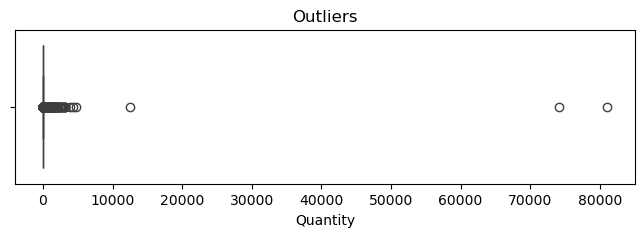

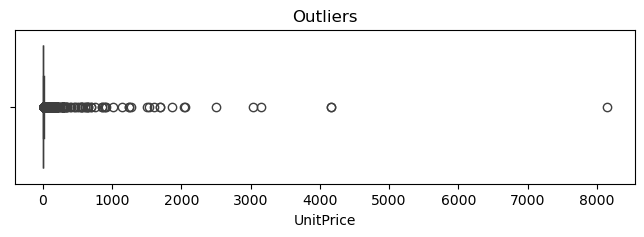

In [29]:
 # Checking the outliers by selecting the features from customer level insights

customer_metrics1 = ['Quantity', 'UnitPrice']


# Checking if the selected features exist in the dataset using list comprehension

customer_metrics1 = [col for col in customer_metrics1 if col in or_data.columns]

# Plotting boxplot

for col in customer_metrics1 : 
    plt.figure(figsize=(8,2))
    sns.boxplot(x=or_data[col])
    plt.title('Outliers')
    plt.show()

### Observation 

Both Quantity and UnitPrice distributions show numerous extreme outliers far beyond the typical range, suggesting a small number of transactions have exceptionally high quantities or unit prices that warrant investigation or treatment.

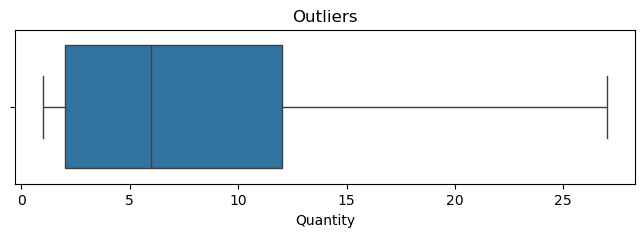

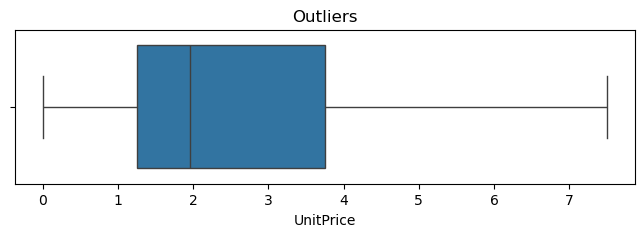

In [31]:
# Handling Outliers using IQR

# Compute IQR & selecting the features Quantity & UnitPrice

features = ['Quantity', 'UnitPrice']

Q1 = or_data[features].quantile(0.25)
Q3 = or_data[features].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers at the 90 percentile

cap = or_data[features].quantile(0.90)

for col in features:
    or_data[col] = np.where(or_data[col] > upper_bound[col], cap[col], or_data[col])

# Plotting boxplot

for col in features : 
    plt.figure(figsize=(8,2))
    sns.boxplot(x=or_data[col])
    plt.title('Outliers')
    plt.show()

In [32]:
or_data.shape

(387880, 7)

In [33]:
or_data.head(10)

,InvoiceNo,StockCode,InvoiceDate,CustomerID,Country,Quantity,UnitPrice
0,536365,21730,12/1/2010 8:26,17850.0,United Kingdom,6.0,4.25
1,536365,22752,12/1/2010 8:26,17850.0,United Kingdom,2.0,6.65
2,536365,71053,12/1/2010 8:26,17850.0,United Kingdom,6.0,3.39
3,536365,84029E,12/1/2010 8:26,17850.0,United Kingdom,6.0,3.39
4,536365,84029G,12/1/2010 8:26,17850.0,United Kingdom,6.0,3.39
5,536365,84406B,12/1/2010 8:26,17850.0,United Kingdom,8.0,2.75
6,536365,85123A,12/1/2010 8:26,17850.0,United Kingdom,6.0,2.55
7,536366,22632,12/1/2010 8:28,17850.0,United Kingdom,6.0,1.85
8,536366,22633,12/1/2010 8:28,17850.0,United Kingdom,6.0,1.85
9,536367,21754,12/1/2010 8:34,13047.0,United Kingdom,3.0,5.95


In [34]:
# Copying the dataset into another variable, to use and make changes, by not affecting the cleaned dataset

purchased_data = or_data.copy()

# The shape of the dataframe after removing the negative values in the Quantity column

print("The size of the dataset :",purchased_data.shape,"\n")

#Display the dataset 

purchased_data.head()

The size of the dataset : (387880, 7) 



,InvoiceNo,StockCode,InvoiceDate,CustomerID,Country,Quantity,UnitPrice
0,536365,21730,12/1/2010 8:26,17850.0,United Kingdom,6.0,4.25
1,536365,22752,12/1/2010 8:26,17850.0,United Kingdom,2.0,6.65
2,536365,71053,12/1/2010 8:26,17850.0,United Kingdom,6.0,3.39
3,536365,84029E,12/1/2010 8:26,17850.0,United Kingdom,6.0,3.39
4,536365,84029G,12/1/2010 8:26,17850.0,United Kingdom,6.0,3.39


# Feature Engineering

In [36]:
# To find Recency,Frequency,Monetary, ProductVariety, Tenure, AOV

# Convert Customer Id ti int

purchased_data['CustomerID'] = purchased_data['CustomerID'].astype(int)

# Ensure the Invoice Date is in datetime format

purchased_data['InvoiceDate']=pd.to_datetime(purchased_data['InvoiceDate'])

# Calculating the latest purchase for using it in recency

latest_purchase = purchased_data['InvoiceDate'].max()

# Calculate Total Cost using quantity and unit price

purchased_data['TotalCost'] = purchased_data['Quantity'] * purchased_data['UnitPrice']

# Calculate Recency, Frequency, Monetary, AOV, ProductVariety, Tenure metrics by grouping data by Customer ID

purchased_data = purchased_data.groupby('CustomerID').agg (
                Recency = ('InvoiceDate', lambda x: (latest_purchase - x.max()).days),
                Frequency = ('InvoiceNo','nunique'),
                Monetary = ('TotalCost','sum'),
                ProductVariety = ('StockCode','nunique'),
                Tenure=('InvoiceDate', lambda x: (x.max() - x.min()).days),
                ).reset_index()

purchased_data['AOV'] = purchased_data['Monetary'] / purchased_data['Frequency']

purchased_data.head()


,CustomerID,Recency,Frequency,Monetary,ProductVariety,Tenure,AOV
0,12346,325,1,24.96,1,0,24.960000
1,12347,1,7,3814.40,103,365,544.914286
2,12348,74,4,458.93,22,282,114.732500
3,12349,18,1,1298.55,73,0,1298.550000
4,12350,309,1,301.05,17,0,301.050000


### Description

We have done the grouping of customerid, to convert transaction level data into customer level insights, as this is essential for segmentation.

1) **Recency**	: The recency tells us how many days ago the customer made purchase, it is used for finding the recent active customer and we calculate    the days between the absolute latest date and the customer's latest date using InvoiceDate
2) **Frequency** :	The frequency tells us the sepearte transactions the customer has made, it is used for identifying the customers who purchase often    and to calculate frequency we count the number of unique values of the InvoiceNo for the customers.
3) **Monetary** : The Monetary gives us the total amount of money the customer has spent across all purchases, it is used for identifying the high-        spending customers and to calculate Monetary we take the total cost we multiply using quantity and unit price.
4) **ProductVariety** : The AOV tells us how many different unique products the customer has bought, it is used to see if a customer buys a wide range     of items or focuses on a few and to calculate ProductVariety we count the number of unique values of the StockCode for the customers.
5) **Tenure** : The frequency tells us the number of days between the customer's very first and very last recorded purchase, it is used for measuring      how long the customer has been actively purchasing within the dataset's timeframe and to calculate Tenure we consider the days between the customers    minimum InvoiceDate and maximum InvoiceDate.         
6) **AOV (Average Order Value)** : The AOV gives us the average amount spent by the customer each time they make a purchase, it is used to understand       the typical transaction size for a customer and to calculate AOV we divide the customer's total Monetary value by their Frequency.

# Exploratory Data Analysis 

In [39]:
# Descriptive Statistics

purchased_data[['Recency', 'Frequency', 'Monetary', 'ProductVariety', 'Tenure', 'AOV']].describe()

,Recency,Frequency,Monetary,ProductVariety,Tenure,AOV
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,91.518322,4.271952,1332.651987,61.489283,130.418530,294.187681
std,100.009747,7.705493,3321.166070,85.363900,132.039186,255.301471
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,17.000000,1.000000,252.455000,16.000000,0.000000,149.338333
50%,50.000000,2.000000,564.980000,35.000000,92.000000,239.819091
75%,141.000000,5.000000,1374.765000,77.000000,251.500000,361.107500
max,373.000000,210.000000,110377.220000,1787.000000,373.000000,4954.840000


### Observation 

In the descriptive statitics for each of the customer level features calculated the mean is much higher than the 50% value which is the median and for the 75% value the customers are spending less. So this shows that our data is right skewed. Also we can observe for the 75% value is far away from the maximum value, of the data such as monetary and average order value that tells us, this dataset contains outliers.

# Handing Outliers

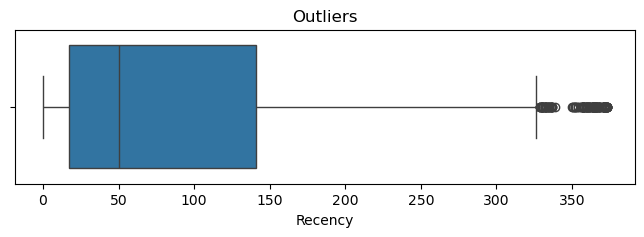

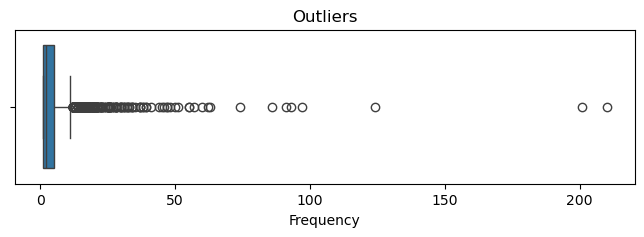

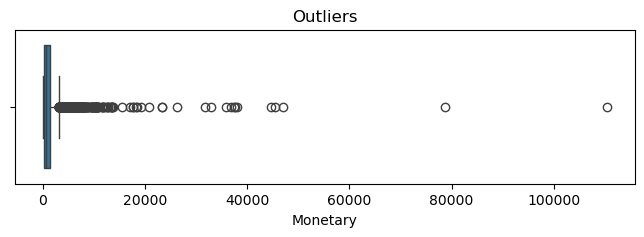

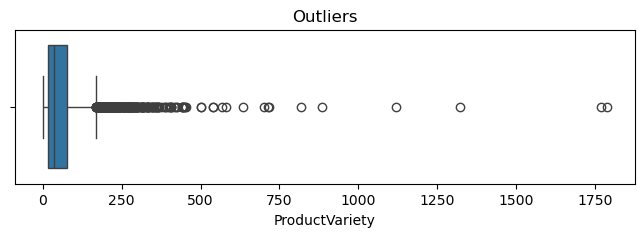

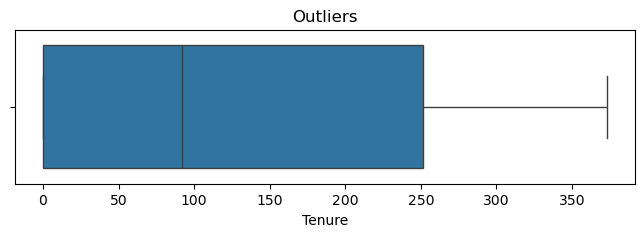

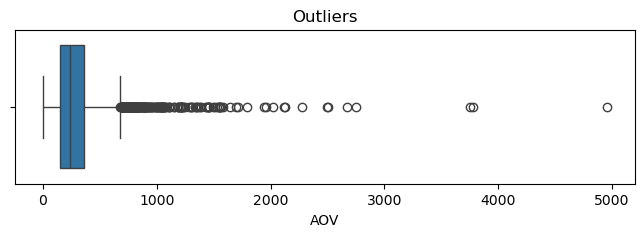

In [42]:
 # Checking the outliers by selecting the features from customer level insights

customer_metrics = ['Recency', 'Frequency', 'Monetary', 'ProductVariety', 'Tenure', 'AOV']

# Checking if the selected features exist in the dataset using list comprehension

customer_metrics = [col for col in customer_metrics if col in purchased_data.columns]

# Plotting boxplot

for col in customer_metrics : 
    plt.figure(figsize=(8,2))
    sns.boxplot(x=purchased_data[col])
    plt.title('Outliers')
    plt.show()

### Observation 

We can observe the box plots that indicates most features in the dataset, especially Frequency, Monetary, ProductVariety and AOV has high number of outliers, this suggests that some customers have high purchase activity compared to the majority. As you can see Tenure has no outliers.

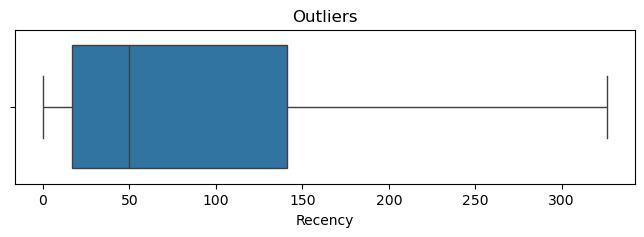

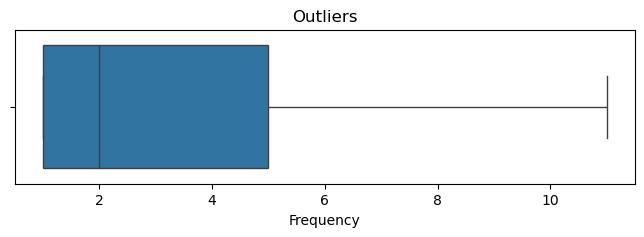

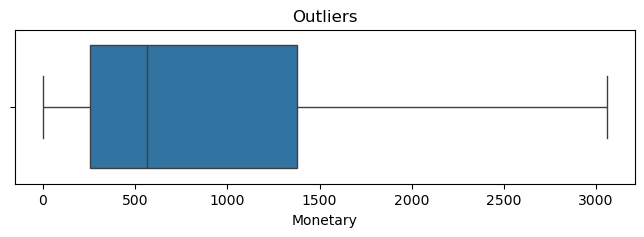

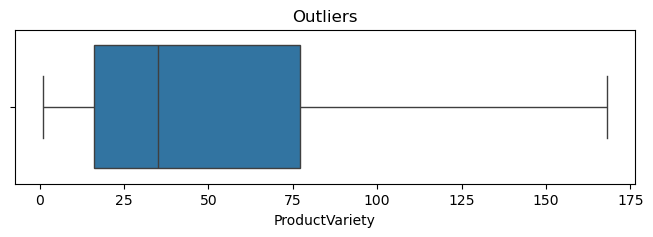

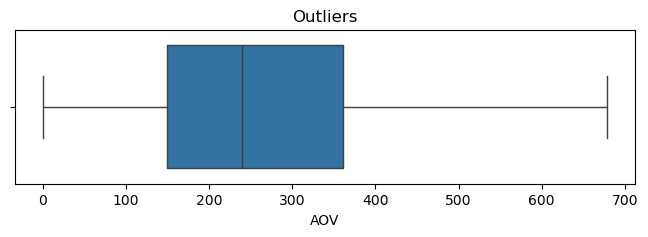

In [44]:
# Handling Outliers using IQR

# Compute IQR & selecting the features from customer level insights

customer_metrics = ['Recency', 'Frequency', 'Monetary', 'ProductVariety', 'AOV']

Q1 = purchased_data[customer_metrics].quantile(0.25)
Q3 = purchased_data[customer_metrics].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers at the 90 percentile

cap = purchased_data[customer_metrics].quantile(0.90)
for col in customer_metrics:
    purchased_data[col] = np.where(purchased_data[col] > upper_bound[col], cap[col], purchased_data[col])

# Plotting boxplot

for col in customer_metrics : 
    plt.figure(figsize=(8,2))
    sns.boxplot(x=purchased_data[col])
    plt.title('Outliers')
    plt.show()


In [45]:
purchased_data.head()

,CustomerID,Recency,Frequency,Monetary,ProductVariety,Tenure,AOV
0,12346,325.0,1.0,24.960,1.0,0,24.960000
1,12347,1.0,7.0,2943.748,103.0,365,544.914286
2,12348,74.0,4.0,458.930,22.0,282,114.732500
3,12349,18.0,1.0,1298.550,73.0,0,522.004000
4,12350,309.0,1.0,301.050,17.0,0,301.050000


### Observation 

After handling the ouliers, done capping aggressively using 90%, we can observe the box plots showing no outlier points beyond the whiskers. The capping seems to have brought any extreme values within the percentile.

# Skewness

Recency: 1.0632
Frequency: 1.1433
Monetary: 1.1302
ProductVariety: 0.9424
Tenure: 0.4550
AOV: 0.5678


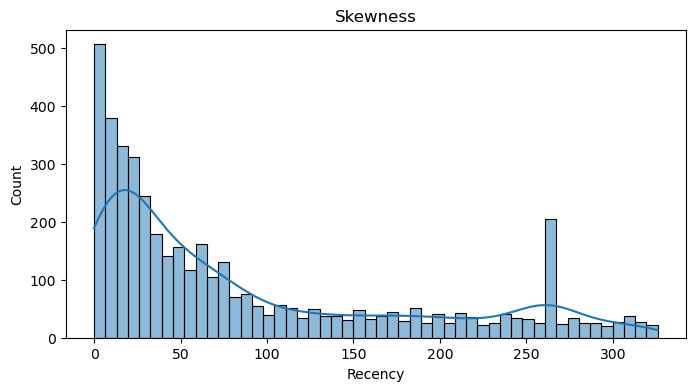

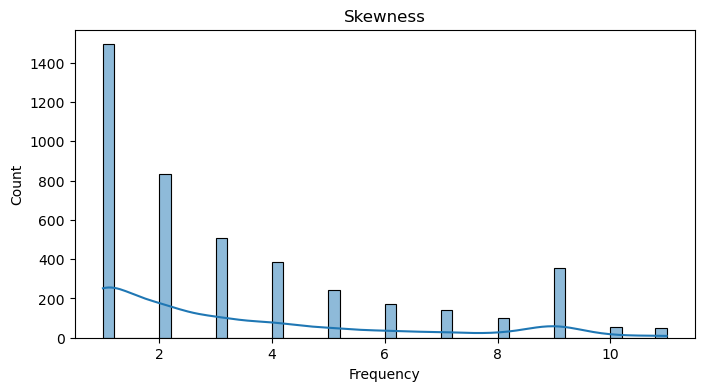

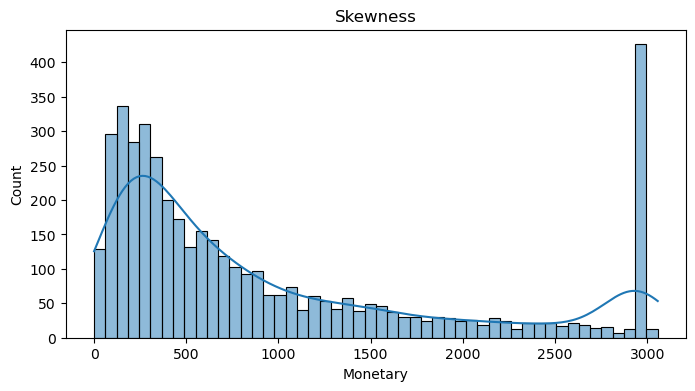

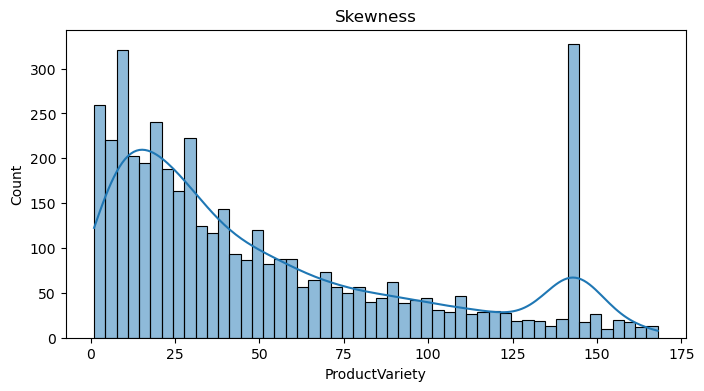

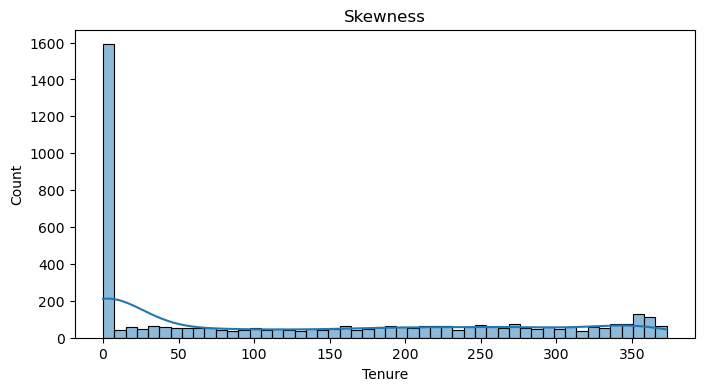

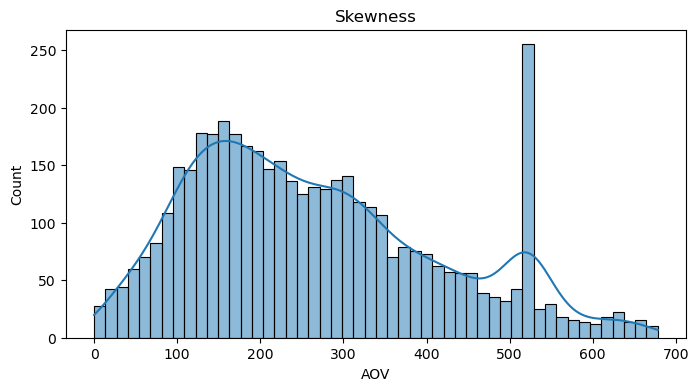

In [48]:
# Checking the skewness by selecting the features from customer level insights

customer_metrics = ['Recency', 'Frequency', 'Monetary', 'ProductVariety', 'Tenure', 'AOV']

# Checking if the selected features exist in the dataset using list comprehension

customer_metrics = [col for col in customer_metrics if col in purchased_data.columns]

for col in customer_metrics:
    print(f"{col}: {purchased_data[col].skew():.4f}")
    
# Plotting histplot using kernel density estimation(KDE)

for col in customer_metrics:
    plt.figure(figsize=(8,4))
    sns.histplot(purchased_data[col],kde=True,bins=50)
    plt.title('Skewness')
    plt.show()

### Observation 

When we visualize the data to check for skewness, we observe that the distribution is right-skewed, also known as positively skewed, that means the tail on the right side of the distribution is longer and most of the data is present on the left side. 
Taking each features as to why they are right-skewed :
1) **Recency :** Highly right-skewed : most customers purchased recently and few are long inactive.
2) **Frequency :** Highly right-skewed : most buy rarely; few buy often.
3) **Monetary :** Highly right-skewed : few customers drive most spending.
4) **ProductVariety :**  Moderately right-skewed : most stick to few items and some explore more.
5) **Tenure :** Fairly balanced : customers have a mix of short and long relationships.
6) **AOV :** Moderately right-skewed : most orders are similar in value and a few are high.

Skewness after Yeo-Johnson Transformation:

Recency: -0.0833
Frequency: 0.1608
Monetary: -0.0341
ProductVariety: -0.0666
AOV: -0.0524


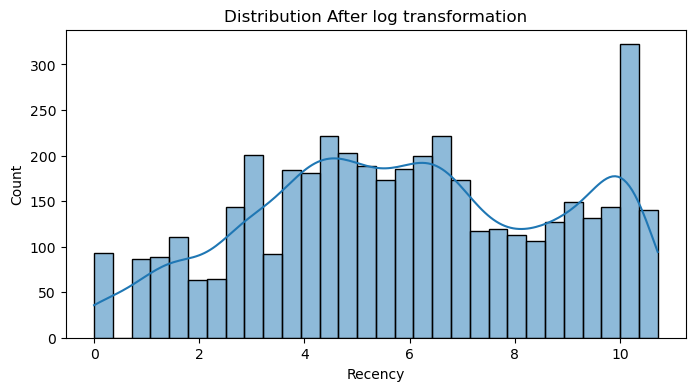

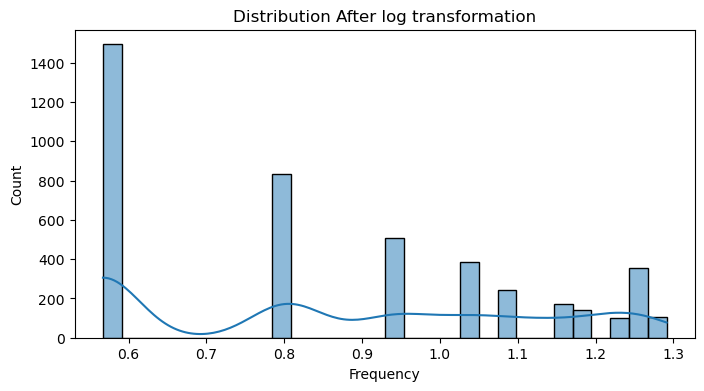

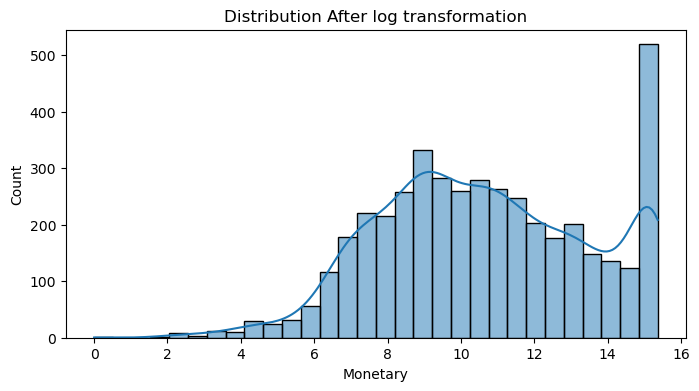

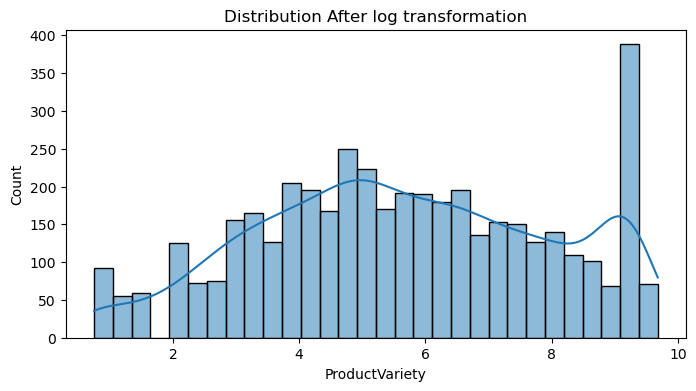

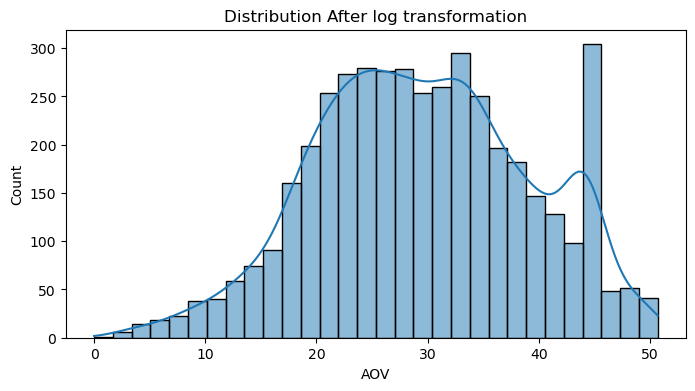

In [50]:
# Handling the skewness using Yeo-Johnson transformation

# Checking the skewness by selecting the features from customer level insights excluding tenure.

customer_metrics = ['Recency', 'Frequency', 'Monetary', 'ProductVariety', 'AOV']

# Checking if the selected features exist in the dataset using list comprehension

customer_metrics = [col for col in customer_metrics if col in purchased_data.columns]

# Initializing Yeo-Johnson transformer

yeo_transform = PowerTransformer(method='yeo-johnson',standardize=False)

# Fit and transform the data

transform = yeo_transform.fit_transform(purchased_data[customer_metrics])

# Replace the columns in a copy of original DataFrame

purchased_data[customer_metrics] = transform

#  Skewness after Yeo-Johnson

print("Skewness after Yeo-Johnson Transformation:\n")

for col in customer_metrics:
    print(f"{col}: {purchased_data[col].skew():.4f}")
    
# Plotting using hitplot

for col in customer_metrics:
    plt.figure(figsize=(8,4))
    sns.histplot(purchased_data[col],kde=True,bins=30)
    plt.title('Distribution After log transformation')
    plt.show()

### Observation 

We haven't considered the Tenure in Yeo-Johnson transformation because when we checked for skewness we found out the Tenure value to be 0.4550 and it fulfills the target range for approximate symmetry (-0.5 to +0.5).

The skewness value for each feature after the Yeo-Johnson transformation against the target range for approximate symmetry **-0.5 to +0.5 :** 
1) **Recency :** -0.0833 
2) **Frequency :** 0.1608 
3) **Monetary :** -0.0341 
4) **ProductVariety :**  -0.0666 
5) **AOV :** -0.0524
 
All features now exhibit approximate symmetry, making them useful for the scaling the data.

# Scaling 

In [53]:
# Scaling the data using standard scaler

# Choosing the features to scale by from customer level insights

customer_metrics = ['Recency', 'Frequency', 'Monetary', 'ProductVariety', 'Tenure', 'AOV']

#Initializing the object 

standard_scaler = StandardScaler()

# Fit and transform the data

scaled_data = standard_scaler.fit_transform(purchased_data[customer_metrics])

# Converting the scaled NumPy array back into a structured DataFrame

convert_data = pd.DataFrame(scaled_data, columns = customer_metrics, index = purchased_data.index)

# Replace the columns in a copy of original DataFrame

purchased_data[customer_metrics] = convert_data

# Checking Mean and Standard Deviation after scaling

print("Mean and Standard Deviation Value : \n")

display(purchased_data[customer_metrics].describe().loc[['mean','std']])

Mean and Standard Deviation Value : 



,Recency,Frequency,Monetary,ProductVariety,Tenure,AOV
mean,2.210723e-16,-3.463466e-16,5.502244e-16,-1.342810e-16,-1.015295e-16,-4.585203e-16
std,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00


### Observation

We can observe that the dataset values have been successfully scaled and transformed where all the customer level insights features has a mean equal to zero and a standard deviation equal to one. 

In [55]:
purchased_data.head()

,CustomerID,Recency,Frequency,Monetary,ProductVariety,Tenure,AOV
0,12346,1.690597,-1.161893,-2.261985,-2.142080,-0.987840,-2.229063
1,12347,-1.832182,1.310570,1.605251,1.134338,1.776810,1.635080
2,12348,0.297516,0.689796,-0.238982,-0.468694,1.148136,-1.034337
3,12349,-0.689282,-1.161893,0.730259,0.723637,-0.987840,1.529993
4,12350,1.636008,-1.161893,-0.591028,-0.681287,-0.987840,0.366570


# Univariate Analysis

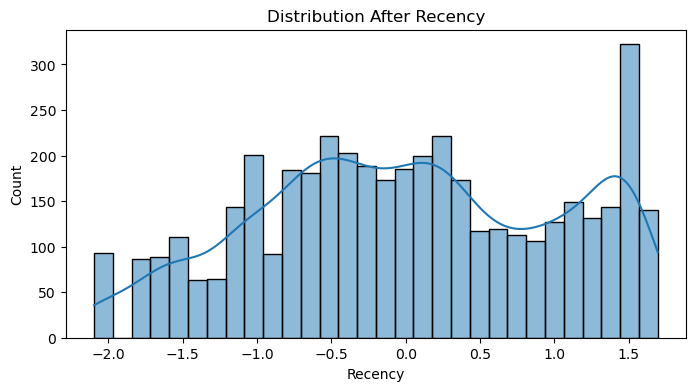

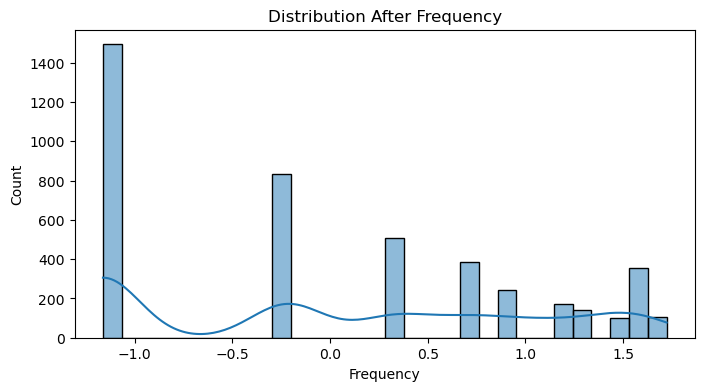

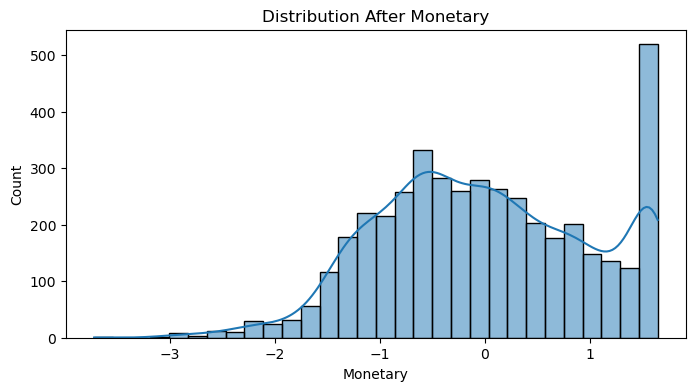

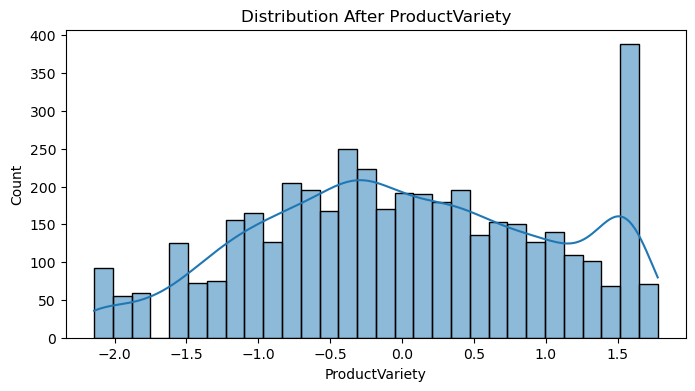

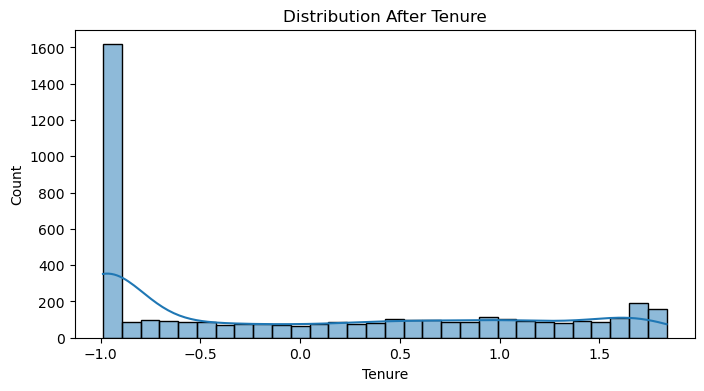

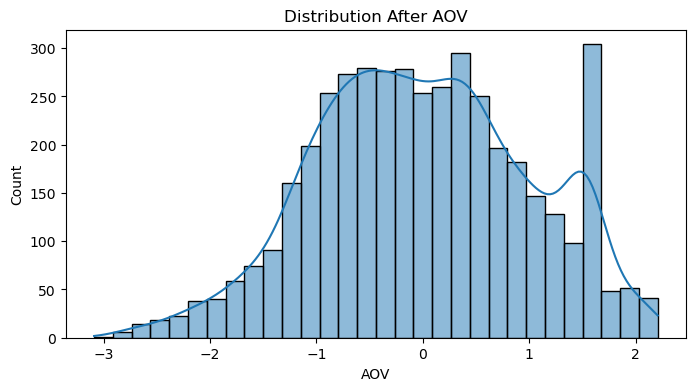

In [57]:
# Plotting histplot for all the features

for col in customer_metrics:
    plt.figure(figsize=(8,4))
    sns.histplot(purchased_data[col],kde=True,bins=30)
    plt.title(f'Distribution After {col}')
    plt.show()

### Observation

The distributions of all features have significantly improved, becoming more symmetrical and close to normal. 

# Bivariate Analysis using Correlation heatmap

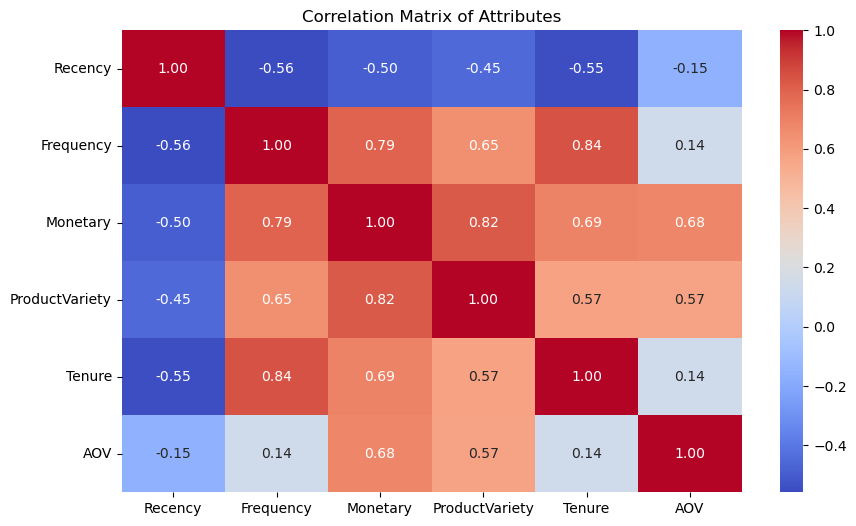

In [60]:
# Finding correlation between attributes using heatmap

features = purchased_data[customer_metrics]
correlation_matrix = features.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Attributes")
plt.show()

### Observation 

1) The heatmap shows strong positive correlations between Frequency, Monetary, Tenure, and Product Variety, indicating that customers who purchase often also tend to spend more overall, have been customers longer, and buy a wider range of products.
2) Recency shows moderate negative correlations with these metrics, suggests new customers doesn't have high frequency or monetary value.
3) Average Order Value is strongly correlated with Monetary and shows weaker correlations with Frequency and Tenure.

# Multicollinearity

In [63]:
# Choosing the features to scale by from customer level insights

# VIF Calculation

features = purchased_data[customer_metrics]
vif_data = pd.DataFrame()
vif_data['Feature']=features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
print(vif_data)

          Feature        VIF
0         Recency   1.525841
1       Frequency  14.576573
2        Monetary  24.295235
3  ProductVariety   3.091814
4          Tenure   3.604744
5             AOV   8.748654


### Observation 

The range of high Variance Inflation Factor (VIF) values (commonly > 5 or 10) indicate strong multicollinearity. 

1) Monetary has value 24.29 and Frequency has value 14.57, which suggests high VIF values indicating strong multicollinearity.
2) Monetary has value 8.75, which is high but still lower than Monetary and Frequency and suggests moderate multicollinearity.

In [65]:
# Copying the dataset into another variable, to use and make changes, by not affecting the scaled dataset

data = purchased_data.copy()

# Dropping the column Monetary 

data.drop(columns=['Monetary'], inplace=True)

# Update customer_metrics list 

customer_metrics = ['Recency', 'Frequency', 'ProductVariety', 'Tenure', 'AOV']

# VIF Calculation

features = data[customer_metrics]
vif_data = pd.DataFrame()
vif_data['Feature']=features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
print(vif_data)

          Feature       VIF
0         Recency  1.523747
1       Frequency  4.412387
2  ProductVariety  2.947102
3          Tenure  3.596281
4             AOV  1.723192


### Observation 

1) We dropped the Monetary column to avoid repetition, since it's closely related to Frequency and AOV. This reduces overlapping and gives accuracy.
2) All the Variance Inflation Factor (VIF) for each numeric features are now below 5, the features are more independent and will avoid overfitting the model.

In [67]:
# Display first 5 rows

data.head()

,CustomerID,Recency,Frequency,ProductVariety,Tenure,AOV
0,12346,1.690597,-1.161893,-2.142080,-0.987840,-2.229063
1,12347,-1.832182,1.310570,1.134338,1.776810,1.635080
2,12348,0.297516,0.689796,-0.468694,1.148136,-1.034337
3,12349,-0.689282,-1.161893,0.723637,-0.987840,1.529993
4,12350,1.636008,-1.161893,-0.681287,-0.987840,0.366570


# K-Means Clustering Algorithm

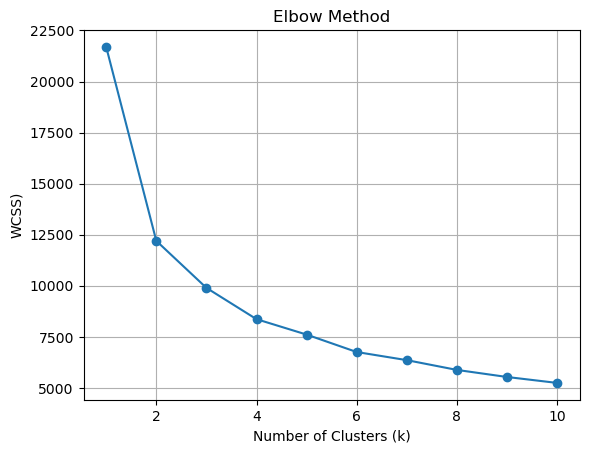

In [69]:
# Selecting the features

customer_metrics = ['Recency', 'Frequency', 'ProductVariety', 'Tenure', 'AOV']
features = data[customer_metrics] 

# Using elbow method 

wcss = [] # Shows how spread the customers are from their group center

# Take range from 1 to 10
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=0)
    kmeans.fit_predict(features) # Fit the data for training the model
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


# Observation 

The WCSS decreases sharply from k=1 to k=3, indicating improvement in clustering with fewer clusters. After k=3, and particularly after k=4, the rate of decrease slows down considerably, forming a visible "elbow" around these points. 

In [71]:
# Check silhouette scores

# Selecting the features

customer_metrics = ['Recency', 'Frequency', 'ProductVariety', 'Tenure', 'AOV']
features = data[customer_metrics] 

# Take range from 2 to 6

for k in range(2,7):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state=0)
    labels = kmeans.fit_predict(features)
    score = silhouette_score(features,labels)
    print(f'k={k}, Silhouette Score: {score:.4f}')

k=2, Silhouette Score: 0.3699
k=3, Silhouette Score: 0.2915
k=4, Silhouette Score: 0.2629
k=5, Silhouette Score: 0.2501
k=6, Silhouette Score: 0.2482


### Observation

1) Silhouette Score tells you how well-separated the clusters are. Silhouette Score always ranges from -1 to +1. A score of 0.37 is positive and closer to 0 than to 1, indicates theres overlapping.
2) The Silhouette Score is highest for k=2 (0.3699) compared to others, so we choose this value. 

In [73]:
# Selecting the features

customer_metrics = ['Recency', 'Frequency', 'ProductVariety', 'Tenure', 'AOV']
features = data[customer_metrics] 

# List of cluster(k) values to iterate over

kmeans_final = KMeans(n_clusters=2, init = 'k-means++', random_state=0)
labels_final = kmeans_final.fit_predict(features)

# Add cluster labels to original data
    
data['Cluster_KMeans'] = labels_final

# Displaying the calculated size of the clusters

print(f"Cluster Sizes when k={2}:\n")
print(data['Cluster_KMeans'].value_counts(),"\n")

# Displaying the calculated cluster-wise means of all the features from the dataset

cluster_feature = data.groupby('Cluster_KMeans')[customer_metrics].mean()
print(f"Feature Averages when k={2}:\n", cluster_feature,"\n")

Cluster Sizes when k=2:

Cluster_KMeans
0    2304
1    2035
Name: count, dtype: int64 

Feature Averages when k=2:
                  Recency  Frequency  ProductVariety    Tenure       AOV
Cluster_KMeans                                                         
0               0.559194  -0.756530       -0.644300 -0.751209 -0.261584
1              -0.633112   0.856533        0.729468  0.850509  0.296162 



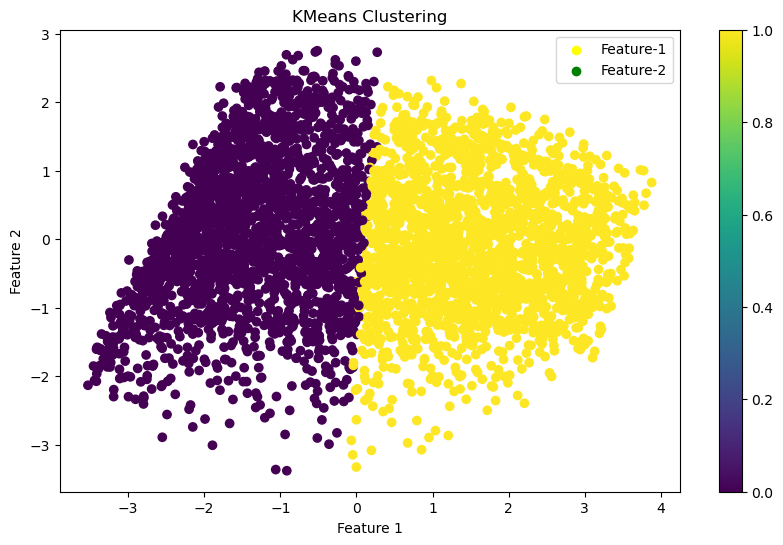

In [74]:
# Visualization using PCA to reduce to 2D
pca = PCA(n_components=2)
features_transform = pca.fit_transform(features)

# Plot scatterplot
plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(features_transform[:, 0], features_transform[:, 1], c=labels_final, cmap='viridis')

#Add legends to distinguish
plt.scatter([],[], c="yellow",label="Feature-1")
plt.scatter([],[], c="green",label="Feature-2")
plt.colorbar(scatter_plot)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Observations

**For k=2**

1) We can't directly plot 5 features on a standard 2D scatter plot, so we use PCA, which reduces 5 features into 2 axis.
2) Cluster 0 (2304 Customers): This cluster represents customers who have low frequency of purchases and low product variety interest, but they have been with you for a moderate amount of time (average tenure) and show some engagement.
3) Cluster 1 (2035 Customers): This cluster represents your most engaged customers with high frequency, long tenure, and high interest in product variety. These are the "loyal" customers who likely spend more per order (higher AOV) and have been with you for a while.

### Solution 

In the next modelling technique will be DBSCAN, because the K-Means results specifically the low Silhouette scores across different 'k' values suggest K-Means is not able to find very distinct and separated clusters.

# DBSCAN Clustering Algorithm

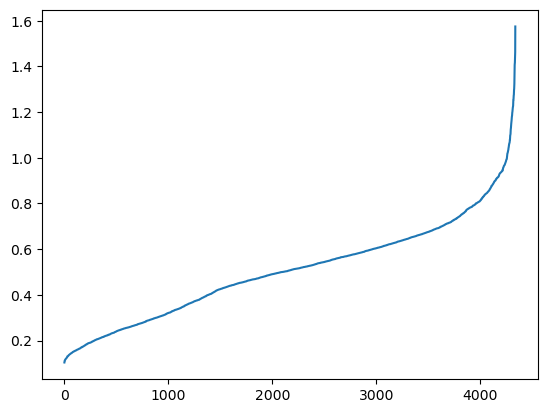

In [78]:
# Hyperparameter Tuning for DBSCAN 

# Selecting the features

customer_metrics = ['Recency', 'Frequency', 'ProductVariety', 'Tenure', 'AOV']
features = data[customer_metrics]  

# Implement k nearest neighbors

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit=neighbors.fit(features)

# Extract Distances and Indices of data points

distances,indices = neighbors_fit.kneighbors(features)

# Sort the distance to kth nearest neighbor in ascending order

distances = np.sort(distances[:,9]) # Taking 9 because n_neighbors is 10

plt.plot(distances)



### Observation 

1) Taken higher min_samples(k) = 10, as it helps DBSCAN algorithm to ignore random noise and focus on more dense areas.
2) This plot shows the sorted distances to the 10th nearest neighbor. Looking at the elbow curve where it has the bend at 0.6 onwards. To evaluate this further lets consider eps=0.6. Also lets find the number of cluters excluding noise points and the number of noise points labeled as -1.

In [80]:
# Selecting the features

customer_metrics = ['Recency', 'Frequency', 'ProductVariety', 'Tenure', 'AOV']
features = data[customer_metrics] 

# Using DBSCAN clustering

print(f"DBSCAN results when eps : 0.6 \n")
dbscan = DBSCAN(eps=0.6,min_samples=10) 
labels_dbscan = dbscan.fit_predict(features) 

# Add the cluster labels to the original data
    
data['Cluster_DBSCAN'] = labels_dbscan 

# Calculate the number of clusters excluding noise points also labelling the noise points as -1

num_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
num_noise = list(labels_dbscan).count(-1)
    
# Displaying the number of clusters excluding noise and noise points
    
print(f"Number of clusters excluding noise: {num_clusters}")
print(f"Number of noise points (labeled as -1): {num_noise}\n")

# Displaying the calculated size of the clusters

print("Cluster Sizes when DBSCAN:")
print(data['Cluster_DBSCAN'].value_counts(), "\n")

# Displaying the calculated cluster-wise means of all features

cluster_feature = data.groupby('Cluster_DBSCAN')[customer_metrics].mean()
print("Feature Averages when DBSCAN:\n", cluster_feature,"\n")

DBSCAN results when eps : 0.6 

Number of clusters excluding noise: 2
Number of noise points (labeled as -1): 653

Cluster Sizes when DBSCAN:
Cluster_DBSCAN
 1    2212
 0    1474
-1     653
Name: count, dtype: int64 

Feature Averages when DBSCAN:
                  Recency  Frequency  ProductVariety    Tenure       AOV
Cluster_DBSCAN                                                         
-1             -0.535190   0.441334        0.071215  0.188301 -0.243206
 0              0.644859  -1.161893       -0.733612 -0.987840 -0.149439
 1             -0.271719   0.643960        0.467830  0.602674  0.171377 



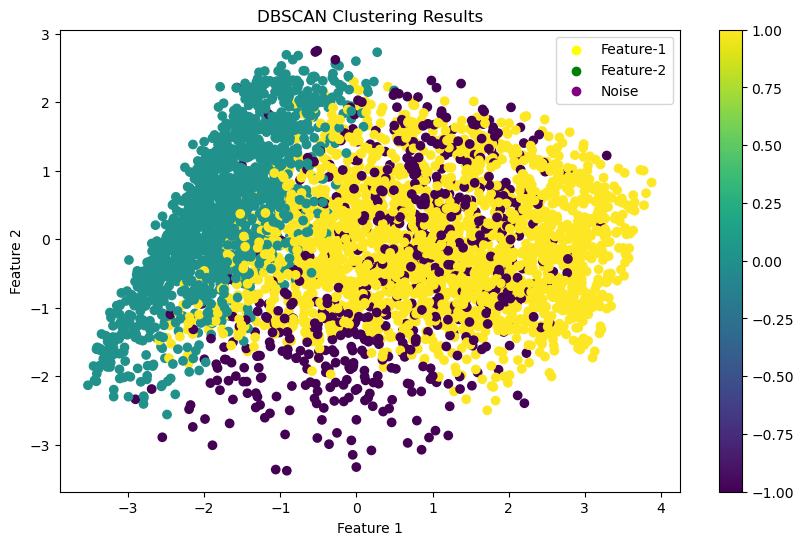

In [81]:
# Visualization using PCA to reduce to 2D
pca = PCA(n_components=2)
features_transform = pca.fit_transform(features)

# Plot scatterplot
plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(features_transform[:, 0], features_transform[:, 1], c=labels_dbscan, cmap='viridis')

#Add legends to distinguish
plt.scatter([],[], c="yellow",label="Feature-1")
plt.scatter([],[], c="green",label="Feature-2")
plt.scatter([],[], c="purple",label="Noise")
plt.colorbar(scatter_plot)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Observation 

**For eps=0.6**

1) We can't directly plot 5 features on a standard 2D scatter plot, so we use PCA, which reduces 5 features into 2 axis.
2)  As eps increases, the number of noise points decreases, and the size of main clusters increases.
3) Clusters:
    - Cluster 0: Remains stable, suggests less engaged customers, with less frequency value.
    - Cluster 1: Grows as eps increases, suggests more engaged and loyal customers, buying recently and frequently.
    - Cluster -1: Outliers that don't fit into the main customer groups.

In [83]:
#Display the first five rows of the dataset

data.head()

,CustomerID,Recency,Frequency,ProductVariety,Tenure,AOV,Cluster_KMeans,Cluster_DBSCAN
0,12346,1.690597,-1.161893,-2.142080,-0.987840,-2.229063,0,0
1,12347,-1.832182,1.310570,1.134338,1.776810,1.635080,1,1
2,12348,0.297516,0.689796,-0.468694,1.148136,-1.034337,1,1
3,12349,-0.689282,-1.161893,0.723637,-0.987840,1.529993,0,0
4,12350,1.636008,-1.161893,-0.681287,-0.987840,0.366570,0,0


# Business Insights

## KMeans Clustering

**For k=2 Clusters**:

    - Insights Cluster 0: Inactive customers with lower engagement.
      Improvise: Target with promotions to increase activity.

    - InsightsCluster 1: Loyal, high-value customers.
      Improvise: Retain with loyalty programs and exclusive offers.

## DBSCAN Clustering

**For DBSCAN (eps = 0.6):**

    - Insights Cluster 0: Inactive customers with lower engagement.  
      Improvise: Target with promotions to increase activity.

    - Insights Cluster 1: Active customers with higher engagement and variety.  
      Improvise: Retain with loyalty programs and personalized offers.

    - Insights Noise points: 653 data points that do not belong to any cluster.  
      Improvise: Investigate potential outliers or irrelevant data.

**From both K-Means and DBSCAN we derive the Business Strategy**

1) Re-engage Inactive Customers (Cluster 0): These customers aren’t as active, but they still have potential. Bring them back with special offers or targeted campaigns. A good re-engagement strategy can help you win them over and boost retention.
2) Retain Active Customers (Cluster 1): These are your loyal, high-value customers. Keep them happy with loyalty programs, personalized offers, and exclusive deals to make sure they stay engaged and keep coming back.
3) Look Into Noise Points for DBSCAN: Noise points are outliers that don’t fit into clusters, you can decide whether to target them or clean up the data.

## Steps for saving the data for creating api's

In [91]:
# Folder creation

os.makedirs("models",exist_ok=True)
os.makedirs("data",exist_ok=True)

# Saving the model tained K-Means using joblib

joblib.dump(kmeans_final,"models/kmeans_model.pkl")

# Copying the dataset into another variable, to use and make changes for creating api, by not affecting the modeled dataset
api_data = data.copy()

# Setting Customer ID as index and then writing to csv

api_data.set_index("CustomerID", inplace=True) 
api_data.to_csv("data/apidata.csv")

#Display the dataset 

print(api_data.head())  

             Recency  Frequency  ProductVariety    Tenure       AOV  \
CustomerID                                                            
12346       1.690597  -1.161893       -2.142080 -0.987840 -2.229063   
12347      -1.832182   1.310570        1.134338  1.776810  1.635080   
12348       0.297516   0.689796       -0.468694  1.148136 -1.034337   
12349      -0.689282  -1.161893        0.723637 -0.987840  1.529993   
12350       1.636008  -1.161893       -0.681287 -0.987840  0.366570   

            Cluster_KMeans  Cluster_DBSCAN  
CustomerID                                  
12346                    0               0  
12347                    1               1  
12348                    1               1  
12349                    0               0  
12350                    0               0  
